## 15 april noteboook

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import scipy.stats as stats

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


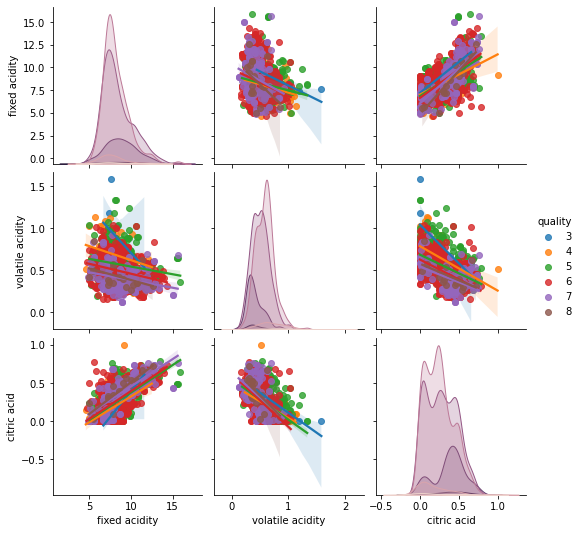

In [6]:
# pairwise plots
labels = ["fixed acidity", "volatile acidity", "citric acid", "quality"]
sns.pairplot(data[labels], kind="reg", hue="quality");

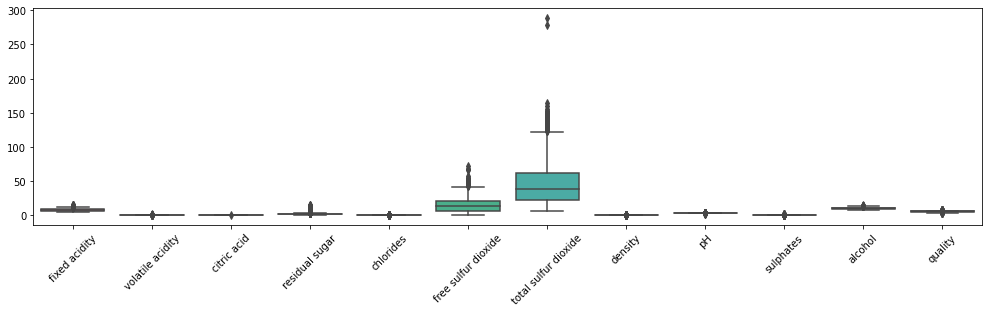

In [7]:
# plotting data
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

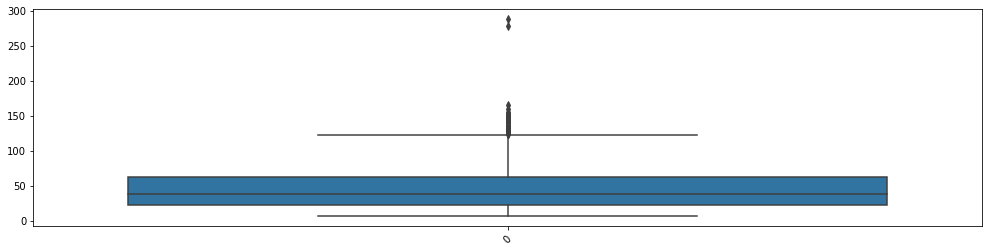

In [8]:
# plotting data
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=data["total sulfur dioxide"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [9]:
data = data[data["total sulfur dioxide"] < 200]

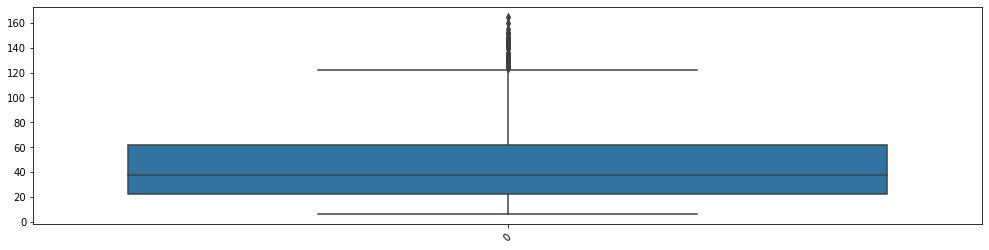

In [10]:
# plotting data
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=data["total sulfur dioxide"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

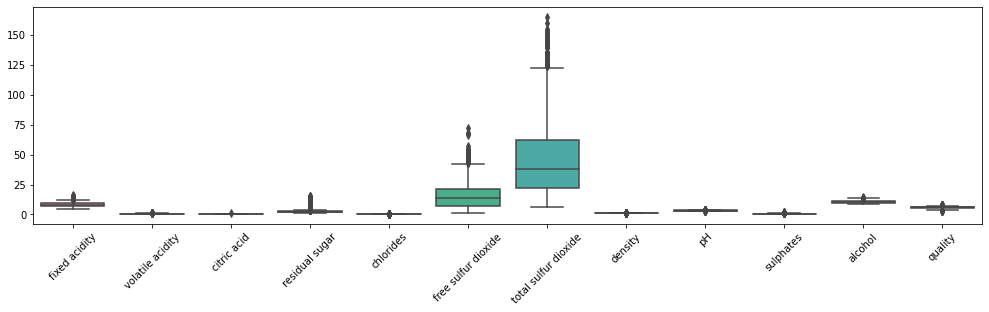

In [11]:
# plotting data
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=data) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [12]:
keys = data.keys()
z_score = keys.drop("quality")

for i in z_score:
  mean_val = np.mean(data[i])
  std = np.std(data[i], ddof=0)
  data[i] = (data[i] - mean_val) / std

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,-1.617199e-14,-1.677778e-15,6.131323e-15,-1.105218e-15,5.081547e-15,-3.573639e-16,-4.084258e-17,4.469328e-13,-2.348431e-15,-1.808193e-15,2.231861e-14,5.634314
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.806630
min,-2.136087e+00,-2.280762e+00,-1.391823e+00,-1.169149e+00,-1.604575e+00,-1.422837e+00,-1.262581e+00,-3.546932e+00,-3.709380e+00,-1.937318e+00,-1.899221e+00,3.000000
25%,-7.006076e-01,-7.718255e-01,-9.286769e-01,-4.525789e-01,-3.721412e-01,-8.478700e-01,-7.596977e-01,-6.111392e-01,-6.587444e-01,-6.392206e-01,-8.653154e-01,5.000000
50%,-2.412541e-01,-4.530063e-02,-5.384522e-02,-2.376079e-01,-1.809014e-01,-1.770746e-01,-2.568145e-01,-6.216372e-04,-9.673073e-03,-2.261897e-01,-2.073755e-01,6.000000
75%,5.051954e-01,6.253377e-01,7.695258e-01,4.902022e-02,5.283609e-02,4.937208e-01,4.975104e-01,5.780428e-01,5.744912e-01,4.228588e-01,6.385471e-01,6.000000
max,4.352281e+00,5.878672e+00,3.754246e+00,9.292776e+00,1.112349e+01,5.380944e+00,3.734821e+00,3.683719e+00,4.533826e+00,7.916418e+00,4.210221e+00,8.000000


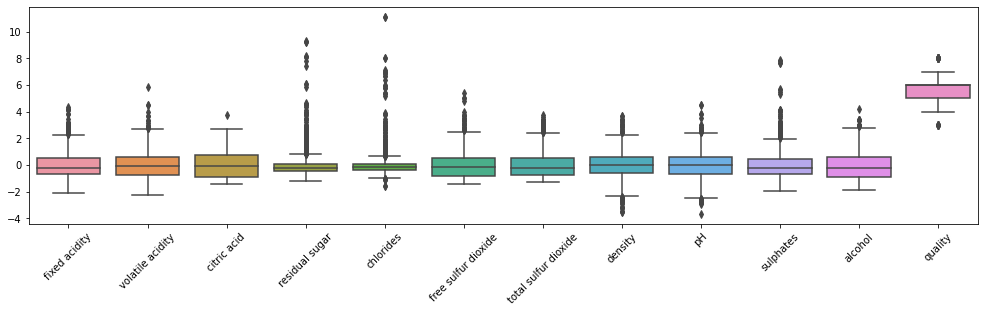

In [14]:
# plotting data
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=data) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

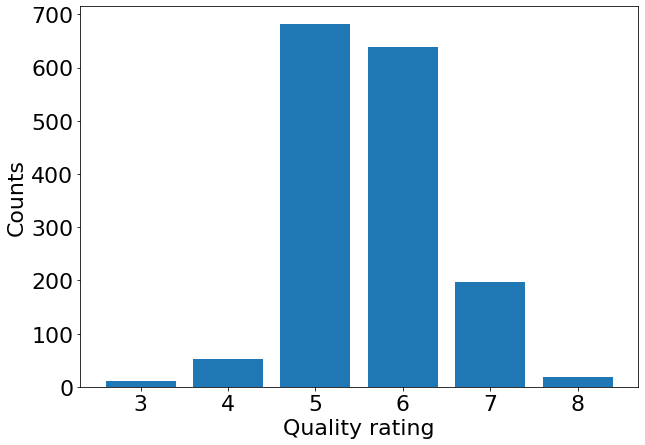

In [15]:
fig = plt.figure(figsize=(10, 7))
plt.rcParams.update({"font.size": 22})

counts = data["quality"].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel("Quality rating")
plt.ylabel("Counts")
plt.show()

In [16]:
data["good"] = 0
data["good"][data["quality"] > 5] = 1

C:\Users\hdotd\AppData\Local\Temp\ipykernel_8364\2603522063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["good"][data["quality"] > 5] = 1


In [17]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,1
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0


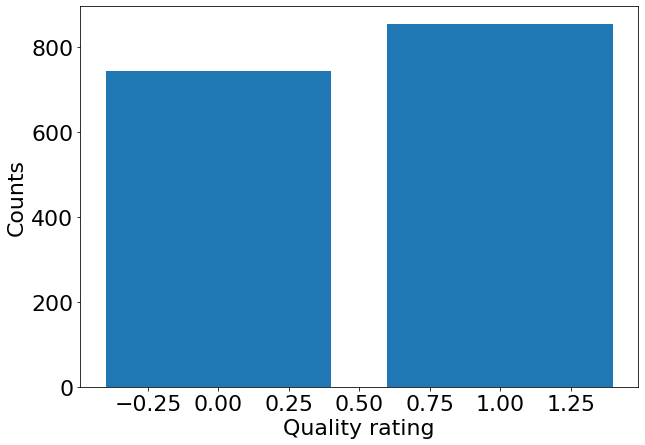

In [18]:
fig = plt.figure(figsize=(10, 7))
plt.rcParams.update({"font.size": 22})

counts = data["good"].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel("Quality rating")
plt.ylabel("Counts")
plt.show()

In [19]:
tensor_data = torch.tensor(data[z_score].values).float()
labels = torch.tensor(data["good"].values).float()

In [20]:
tensor_data.shape, labels.shape

(torch.Size([1597, 11]), torch.Size([1597]))

In [21]:
labels = labels[:, None]

In [22]:
train_data, test_data, train_labels, test_labels = train_test_split(
    tensor_data,
    labels,
    test_size=0.2
)

In [23]:
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

In [24]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data,
                         batch_size=test_data.tensors[0].shape[0])

In [25]:
for x, y in train_loader:
  print(x.shape, y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([61, 11]) torch.Size([61, 1])


In [26]:
class ModelWine(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(11, 16)
    self.h1 = nn.Linear(16, 64)
    self.h2 = nn.Linear(64, 32)
    self.output = nn.Linear(32, 1)

  def forward(self, x):
    x = F.relu(self.input(x))
    x = F.dropout(x, p=0.2)
    x = F.relu(self.h1(x))
    x = F.dropout(x, p=0.2)
    x = F.relu(self.h2(x))
    x = F.dropout(x, p=0.2)
    return self.output(x)

In [27]:
def train_model(epochs=2000):
  wine_net = ModelWine()
  Loss = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(wine_net.parameters(), lr=0.005)

  losses = torch.zeros(epochs)
  train_acc = []
  test_acc = []

  for i in range(epochs):
    batch_acc = []
    batch_loss = []
    for x, y in train_loader:
      # Forward Pass
      y_hat = wine_net(x)
      loss = Loss(y_hat, y)

      # backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Computre acc on current batch
      batch_loss.append(loss.item())
      batch_acc.append(100 * torch.mean(((y_hat > 0) == y).float()).item())
    train_acc.append(np.mean(batch_acc))
    losses[i] = np.mean(batch_loss)

    wine_net.eval()
    x, y = next(iter(test_loader))
    with torch.no_grad():
      y_hat = wine_net(x)
    test_acc.append(100 * torch.mean(((y_hat > 0) == y).float()).item())
  return train_acc, test_acc, losses

In [28]:
train_acc, test_acc, losses = train_model()

In [29]:
train_acc[-1], test_acc[-1]

(77.80609637498856, 77.49999761581421)

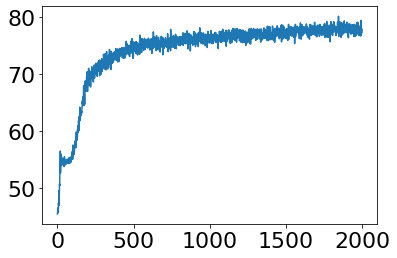

In [30]:
plt.plot(train_acc)

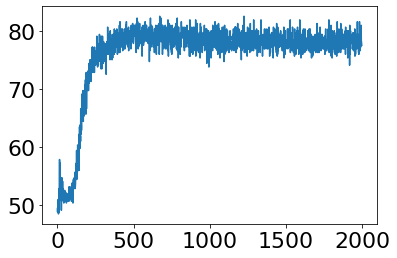

In [31]:
plt.plot(test_acc)

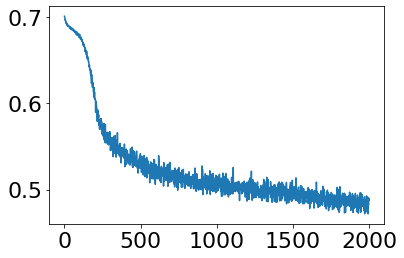

In [32]:
plt.plot(losses)

## 2nd half

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")
data = data[data["total sulfur dioxide"] < 200]

z = data.keys()
z = z.drop("quality")
data[z] = data[z].apply(stats.zscore)

In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,-2.139804e-16,9.065315e-17,5.403039e-16,-4.115542e-17,-3.675832e-16,-1.897355e-16,-1.803504e-16,-8.331324e-14,3.047726e-16,2.351805e-16,-7.342627e-16,5.634314
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.806630
min,-2.136087e+00,-2.280762e+00,-1.391823e+00,-1.169149e+00,-1.604575e+00,-1.422837e+00,-1.262581e+00,-3.546932e+00,-3.709380e+00,-1.937318e+00,-1.899221e+00,3.000000
25%,-7.006076e-01,-7.718255e-01,-9.286769e-01,-4.525789e-01,-3.721412e-01,-8.478700e-01,-7.596977e-01,-6.111392e-01,-6.587444e-01,-6.392206e-01,-8.653154e-01,5.000000
50%,-2.412541e-01,-4.530063e-02,-5.384522e-02,-2.376079e-01,-1.809014e-01,-1.770746e-01,-2.568145e-01,-6.216372e-04,-9.673073e-03,-2.261897e-01,-2.073755e-01,6.000000
75%,5.051954e-01,6.253377e-01,7.695258e-01,4.902022e-02,5.283609e-02,4.937208e-01,4.975104e-01,5.780428e-01,5.744912e-01,4.228588e-01,6.385471e-01,6.000000
max,4.352281e+00,5.878672e+00,3.754246e+00,9.292776e+00,1.112349e+01,5.380944e+00,3.734821e+00,3.683719e+00,4.533826e+00,7.916418e+00,4.210221e+00,8.000000


In [15]:
data["good"] = 0
data["good"][data["quality"] > 5] = 1

C:\Users\hdotd\AppData\Local\Temp\ipykernel_18248\2603522063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["good"][data["quality"] > 5] = 1


In [16]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,1
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0


In [17]:
data_t = torch.tensor(data[z].values).float()
labels = torch.tensor(data["good"].values).float()
labels = labels[:, None]

In [19]:
labels

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [1.]])

In [20]:
train_data, test_data, train_label, test_label = train_test_split(data_t,
                                                                 labels,
                                                                 test_size=0.2)

In [21]:
train_data = TensorDataset(train_data, train_label)
test_data = TensorDataset(test_data, test_label)

In [24]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [55]:
class BNormWineModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Input layer
        self.input = nn.Linear(11, 16)
        # Hidden layers
        self.hidden_1 = nn.Linear(16, 32)
        self.norm_1 = nn.BatchNorm1d(16)
        self.hidden_2 = nn.Linear(32, 20)
        self.norm_2 = nn.BatchNorm1d(32)
        # Output layer
        self.output = nn.Linear(20, 1)
    
    # forward pass
    def forward(self, x, batch_on, dr=0):
        x = F.relu(self.input(x))
        if batch_on:
            x = self.norm_1(x)
        x = F.relu(self.hidden_1(x))
        x = F.dropout(x, p=dr)
        if batch_on:
            x = self.norm_2(x)
        x = F.relu(self.hidden_2(x))
        x = F.dropout(x, p=dr)
        x = self.output(x)
        return x

In [69]:
def train_model(dr=0.1, batch_on=True, epochs=2000):
    Loss = nn.BCEWithLogitsLoss()
    model = BNormWineModel()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    losses = []
    train_acc = []
    test_acc = []
    
    for i in range(epochs):
        batch_acc = []
        batch_loss = []
        for x, y in train_loader:
            # forward pass
            y_hat = model(x, batch_on, dr)
            loss = Loss(y_hat, y)
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Calculate performance
            batch_loss.append(loss.item())
            batch_acc.append(100 * torch.mean(((y_hat > 0) == y).float()).item())
        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))
        
        # test acc
        model.eval()
        x, y = next(iter(test_loader))
        with torch.no_grad():
            y_hat = model(x, batch_on, dr)
        test_acc.append(100 * torch.mean(((y_hat > 0) == y).float()).item())
    return train_acc, test_acc, losses

In [70]:
train_acc, test_acc, losses = train_model()

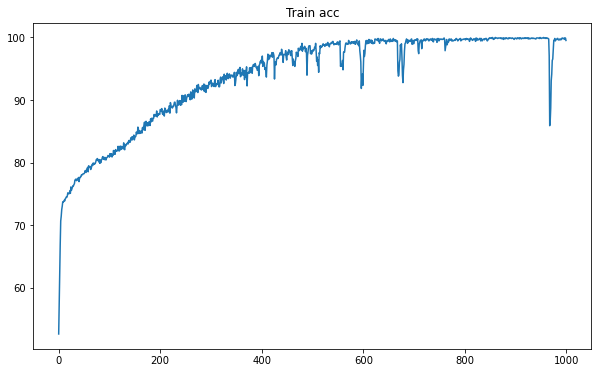

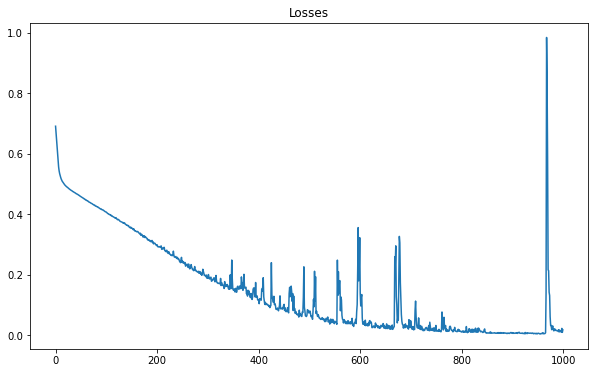

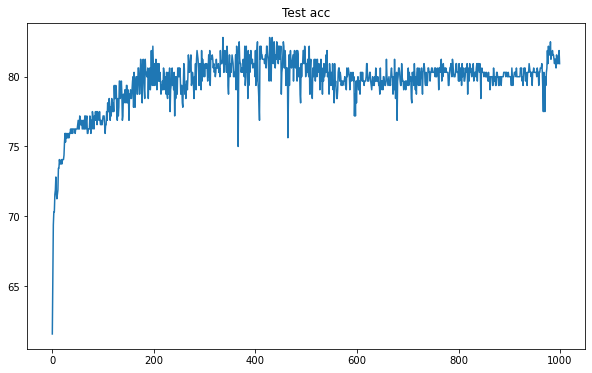

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(train_acc)
plt.title("Train acc");
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title("Losses");
plt.figure(figsize=(10, 6))
plt.plot(test_acc)
plt.title("Test acc");

In [56]:
print("Model 1 without dropout")
print("Test accuracy:", test_acc[-1], "\nTrain accuracy:", train_acc[-1])

Model 1 without dropout
Test accuracy: 80.9374988079071 
Train accuracy: 99.52316805720329


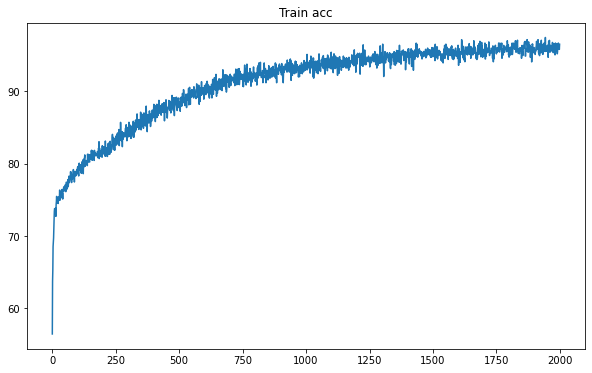

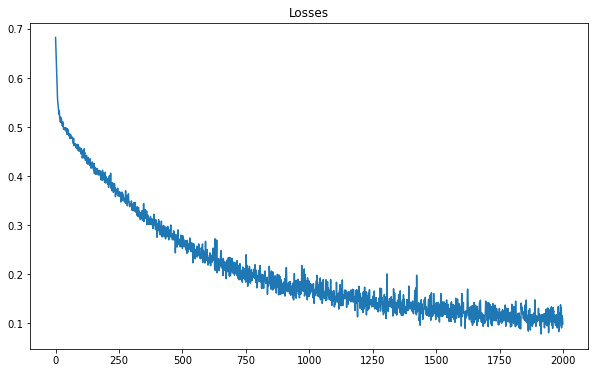

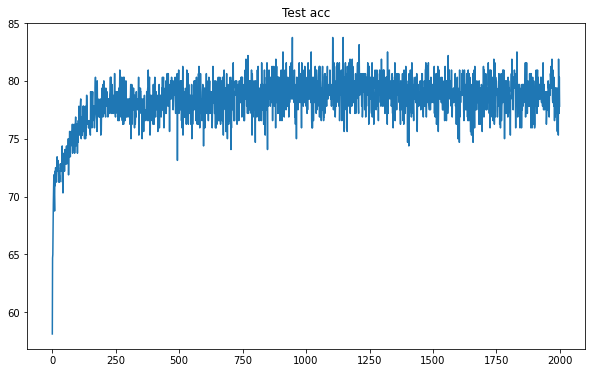

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(train_acc)
plt.title("Train acc");
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title("Losses");
plt.figure(figsize=(10, 6))
plt.plot(test_acc)
plt.title("Test acc");

In [72]:
print("Model 2 with dropout")
print("Test accuracy:", test_acc[-1], "\nTrain accuracy:", train_acc[-1])

Model 2 with dropout
Test accuracy: 77.8124988079071 
Train accuracy: 96.4682112634182


## 3rd half Predict Sugar amount

## Getting Data ready for sugar prediction

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


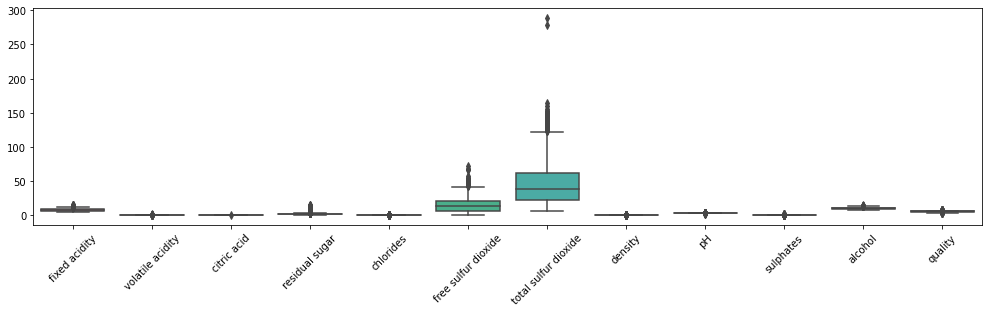

In [4]:
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [5]:
data = data[data["total sulfur dioxide"] < 200]

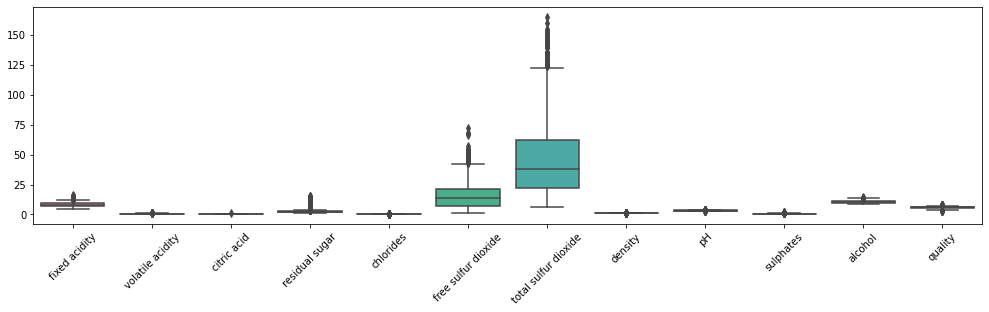

In [6]:
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [9]:
labels = data.keys()
data = data[labels].apply(stats.zscore)

In [11]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,-0.786623
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,-0.786623
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,-0.786623
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,0.453492
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,-0.786623


In [13]:
y = data["residual sugar"]
data = data.drop("residual sugar", axis=1)

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(data, y, test_size=0.2)

In [21]:
train_data = torch.tensor(train_data.values).float()
train_labels = torch.tensor(train_labels.values).float()
test_data = torch.tensor(test_data.values).float()
test_labels = torch.tensor(test_labels.values).float()

train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

In [23]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

## Creating Model for sugar prediction

In [75]:
# Base Model
class SugarModel(nn.Module):
    def __init__(self):
        super().__init__()
        # input layer
        self.input_layer = nn.Linear(11, 16)
        # hidden layers
        self.hidden_1_layer = nn.Linear(16, 32)
        self.hidden_2_layer = nn.Linear(32, 32)
        # output layer
        self.output_layer = nn.Linear(32, 1)
    
    # forward pass
    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_1_layer(x))
        x = F.relu(self.hidden_2_layer(x))
        return F.sigmoid(self.output_layer(x))

In [72]:
def train_sugar_model(epochs=1000):
    
    train_errors = []
    test_errors = []
    model = SugarModel()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    Loss = nn.MSELoss()
    
    for i in range(epochs):
        batch_errors = []
        model.train()
        for x, y in train_loader:
            
            # forward pass
            y_hat = model(x)
            loss = Loss(y_hat, y)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # records
            batch_errors.append(loss.item())
        train_errors.append(np.mean(batch_errors))
        print("Training Epoch", i + 1, " Error:", np.mean(batch_errors))
        # test errors
        model.eval()
        x, y = next(iter(test_loader))
        with torch.no_grad():
            y_hat = model(x)
        test_errors.append(Loss(y_hat, y).item())
    return train_errors, test_errors, model

In [76]:
train_loss, test_loss, model = train_sugar_model()

Training Epoch 1  Error: 1.189766100049019
Training Epoch 2  Error: 1.1570373505353928
Training Epoch 3  Error: 1.1296578012406826
Training Epoch 4  Error: 1.1080991864204406
Training Epoch 5  Error: 1.0890691623091697
Training Epoch 6  Error: 1.069416956603527
Training Epoch 7  Error: 1.0526517525315284
Training Epoch 8  Error: 1.0394766271114348
Training Epoch 9  Error: 1.033317006379366
Training Epoch 10  Error: 1.0186652906239033
Training Epoch 11  Error: 1.0094677746295928
Training Epoch 12  Error: 1.0046194545924663
Training Epoch 13  Error: 0.996183867007494
Training Epoch 14  Error: 0.9946429654955864
Training Epoch 15  Error: 0.993172251433134
Training Epoch 16  Error: 0.9852216728031635
Training Epoch 17  Error: 0.978970791399479
Training Epoch 18  Error: 0.9786354146897793
Training Epoch 19  Error: 0.9748838488012552
Training Epoch 20  Error: 0.9714332543313503
Training Epoch 21  Error: 0.9700808189809322
Training Epoch 22  Error: 0.968313778936863
Training Epoch 23  Error: 

Training Epoch 186  Error: 0.9549703884869813
Training Epoch 187  Error: 0.953310328349471
Training Epoch 188  Error: 0.9535495612770319
Training Epoch 189  Error: 0.9535230193287134
Training Epoch 190  Error: 0.9528959587216377
Training Epoch 191  Error: 0.9539154179394245
Training Epoch 192  Error: 0.9560460466891527
Training Epoch 193  Error: 0.9544357690960169
Training Epoch 194  Error: 0.953495691716671
Training Epoch 195  Error: 0.9563818529248238
Training Epoch 196  Error: 0.954466912150383
Training Epoch 197  Error: 0.9535584449768066
Training Epoch 198  Error: 0.9546451006084681
Training Epoch 199  Error: 0.9540503829717636
Training Epoch 200  Error: 0.953564915060997
Training Epoch 201  Error: 0.9532214399427176
Training Epoch 202  Error: 0.953589865192771
Training Epoch 203  Error: 0.9541569154709577
Training Epoch 204  Error: 0.9615446906536818
Training Epoch 205  Error: 0.9541777368634939
Training Epoch 206  Error: 0.9548410095274449
Training Epoch 207  Error: 0.9570785000

Training Epoch 369  Error: 0.9529574599117041
Training Epoch 370  Error: 0.9527464501559735
Training Epoch 371  Error: 0.9585889510810375
Training Epoch 372  Error: 0.9539191331714392
Training Epoch 373  Error: 0.9529791153967381
Training Epoch 374  Error: 0.955759946256876
Training Epoch 375  Error: 0.9528451215475797
Training Epoch 376  Error: 0.9561713080853224
Training Epoch 377  Error: 0.9534199472516776
Training Epoch 378  Error: 0.9529472507536412
Training Epoch 379  Error: 0.9529513169080019
Training Epoch 380  Error: 0.9538482282310724
Training Epoch 381  Error: 0.956712780892849
Training Epoch 382  Error: 0.9582247324287891
Training Epoch 383  Error: 0.9529293522238731
Training Epoch 384  Error: 0.9527464147657156
Training Epoch 385  Error: 0.9530230283737182
Training Epoch 386  Error: 0.9530462425202131
Training Epoch 387  Error: 0.9526948258280754
Training Epoch 388  Error: 0.9551920633763075
Training Epoch 389  Error: 0.9531695801764727
Training Epoch 390  Error: 0.9535572

Training Epoch 548  Error: 0.953613331541419
Training Epoch 549  Error: 0.9535441435873508
Training Epoch 550  Error: 0.9532275177538395
Training Epoch 551  Error: 0.9527049161493778
Training Epoch 552  Error: 0.9560511104762555
Training Epoch 553  Error: 0.9535507403314114
Training Epoch 554  Error: 0.9540942557156086
Training Epoch 555  Error: 0.9528895322233438
Training Epoch 556  Error: 0.9562649186700583
Training Epoch 557  Error: 0.9529213614761829
Training Epoch 558  Error: 0.9534736454486847
Training Epoch 559  Error: 0.955732611194253
Training Epoch 560  Error: 0.9538090892136097
Training Epoch 561  Error: 0.9526429228484631
Training Epoch 562  Error: 0.953704784438014
Training Epoch 563  Error: 0.9530834216624499
Training Epoch 564  Error: 0.9552187442779541
Training Epoch 565  Error: 0.9602796126157045
Training Epoch 566  Error: 0.9536553978919983
Training Epoch 567  Error: 0.9526583444327116
Training Epoch 568  Error: 0.9558508781716227
Training Epoch 569  Error: 0.95566362

Training Epoch 728  Error: 0.952773279696703
Training Epoch 729  Error: 0.9527549877762794
Training Epoch 730  Error: 0.9538987547159195
Training Epoch 731  Error: 0.9599684596061706
Training Epoch 732  Error: 0.9588810443878174
Training Epoch 733  Error: 0.9527481976896525
Training Epoch 734  Error: 0.9534339908510446
Training Epoch 735  Error: 0.9539990808814764
Training Epoch 736  Error: 0.9549504332244396
Training Epoch 737  Error: 0.9533539634197951
Training Epoch 738  Error: 0.9526701979339123
Training Epoch 739  Error: 0.9539174661040306
Training Epoch 740  Error: 0.9556172527372837
Training Epoch 741  Error: 0.9540251508355141
Training Epoch 742  Error: 0.9534564044326543
Training Epoch 743  Error: 0.9548033254221082
Training Epoch 744  Error: 0.9540119431912899
Training Epoch 745  Error: 0.9544046211987733
Training Epoch 746  Error: 0.9530096858739853
Training Epoch 747  Error: 0.9603474032133817
Training Epoch 748  Error: 0.9530432138592004
Training Epoch 749  Error: 0.956101

Training Epoch 912  Error: 0.9679336294531822
Training Epoch 913  Error: 0.9539070408791304
Training Epoch 914  Error: 0.9545021034777165
Training Epoch 915  Error: 0.9534885697066784
Training Epoch 916  Error: 0.9526968874037266
Training Epoch 917  Error: 0.9602780532091856
Training Epoch 918  Error: 0.9553326541557908
Training Epoch 919  Error: 0.9528354812413454
Training Epoch 920  Error: 0.9532681312412024
Training Epoch 921  Error: 0.9582002308219671
Training Epoch 922  Error: 0.9644465692341327
Training Epoch 923  Error: 0.9534968100488186
Training Epoch 924  Error: 0.9607822749763727
Training Epoch 925  Error: 0.953171432390809
Training Epoch 926  Error: 0.9535921715199948
Training Epoch 927  Error: 0.9543322395533324
Training Epoch 928  Error: 0.9536825608462095
Training Epoch 929  Error: 0.9527527425438166
Training Epoch 930  Error: 0.9579768795520067
Training Epoch 931  Error: 0.9535822670906782
Training Epoch 932  Error: 0.9599524687975645
Training Epoch 933  Error: 0.953328

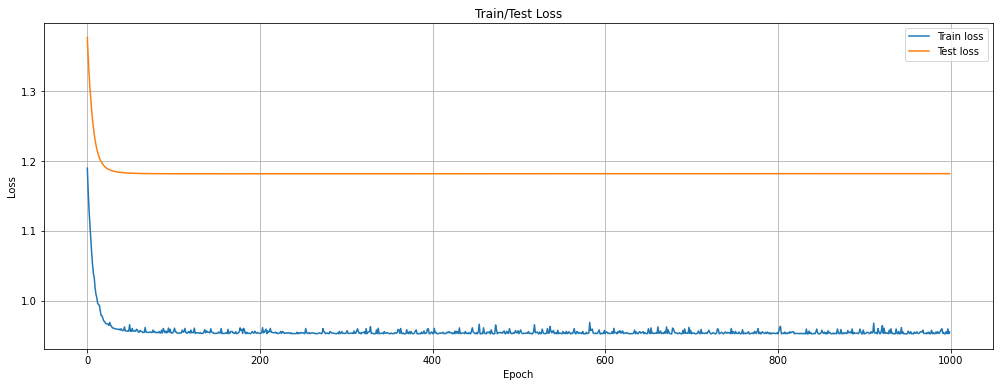

In [77]:
plt.figure(figsize=(17, 6))
plt.plot(train_loss, label="Train loss")
plt.plot(test_loss, label="Test loss")
plt.title("Train/Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()